Topic Modeling



LDA is an algorithm that can “summarize” the main topics of a text collection, now you are asked to use this algorithm to analyze the main topics in the floor debate of the 110th Congress (House only). According to political scientists, there are usually 40-50 common topics going on in each Congress. Tune the number of topics and see if LDA can get you the common topics, such as defense, education, healthcare, economy, etc.


The data set “110” consists of four subfolders. For the subfolder names, “m” means “male”, “f” means “female”, “d” means “democrat”, “r” means “republican”. You can merge all of them into one folder to run Mallet LDA.

OR If you cannot work with Mallet – you can use my code for LDA which also generates a great interactive vis. 

Here is my folder filled with many LDA and API examples:
https://drive.google.com/drive/folders/1_QMxLIffDshlY8U2Nn_yJlAY_5ToF_0e?usp=sharing

Again – you do not need to use Mallet – you may if you wish. You may also use both or multiple methods if you want to go deep.

There are a few other parameters you can tune, such as ngram (for Mallet only). You can decide what parameters to use and explain your decision in the report.
 
Interpreting topic clustering results is very difficult. See if this article “Reading Tea Leaves” may help you. http://www.umiacs.umd.edu/~jbg/docs/nips2009-rtl.pdf. The recommended readings are also great examples to demonstrate how to articulate topic modeling results. 

This is a fairly large data set (100M pure text, more than 400 files). Please start working on it early because it may take a long time to run. 

ALSO – do not start with this HUGE dataset. First, create a small and balanced sample of data or even a different dataset that you find or make that will work. Make sure your code runs on that smaller data first. Then, when everything work – try it on the large dataset. If you still cannot – cut the large dataset down until you can.



NOTE from other Professor: 
To prevent your program from being interrupted, run it as a backend process by adding "&" to the end of your command (for Linux system). Or you can use one subset of the data to build a topic model and explain what topics you have discovered from the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('colheader_justify', 'center')

In [2]:
# use os to create a list of file name
import os
f_d_path = r'./110/110-f-d'
f_r_path = r'./110/110-f-r'
m_d_path = r'./110/110-m-d'
m_r_path = r'./110/110-m-r'

# # assgin the list of filename to variables
f_d_FileNameList=os.listdir(f_d_path)
f_r_FileNameList=os.listdir(f_r_path)
m_d_FileNameList=os.listdir(m_d_path)
m_r_FileNameList=os.listdir(m_r_path)

In [3]:
# use glob to create a list of file path with file name
import glob
f_d_filenames = glob.glob('./110/110-f-d/*.txt')
f_r_filenames = glob.glob('./110/110-f-r/*.txt')
m_d_filenames = glob.glob('./110/110-m-d/*.txt')
m_r_filenames = glob.glob('./110/110-m-r/*.txt')

print("\nf_d_filenames_path:")
print(f_d_filenames[:10])
print("\nf_r_filenames_path:")
print(f_r_filenames[:10])
print("\nm_d_filenames_path:")
print(m_d_filenames[:10])
print("\nm_r_filenames_path:")
print(m_r_filenames[:10])


f_d_filenames_path:
['./110/110-f-d\\110_baldwin_x_wi.txt', './110/110-f-d\\110_bean_x_il.txt', './110/110-f-d\\110_berkley_x_nv.txt', './110/110-f-d\\110_boyda_x_ks.txt', './110/110-f-d\\110_brown-waite_x_fl.txt', './110/110-f-d\\110_brown_x_fl.txt', './110/110-f-d\\110_capps_x_ca.txt', './110/110-f-d\\110_castor_x_fl.txt', './110/110-f-d\\110_clarke_x_ny.txt', './110/110-f-d\\110_davis_x_ca.txt']

f_r_filenames_path:
['./110/110-f-r\\110_bachmann_x_mn.txt', './110/110-f-r\\110_biggert_x_il.txt', './110/110-f-r\\110_blackburn_x_tn.txt', './110/110-f-r\\110_bono_x_ca.txt', './110/110-f-r\\110_capito_x_wv.txt', './110/110-f-r\\110_cubin_x_wy.txt', './110/110-f-r\\110_davis_jo-ann_va.txt', './110/110-f-r\\110_drake_x_va.txt', './110/110-f-r\\110_emerson_x_mo.txt', './110/110-f-r\\110_fallin_x_ok.txt']

m_d_filenames_path:
['./110/110-m-d\\110_abercrombie_x_hi.txt', './110/110-m-d\\110_ackerman_x_ny.txt', './110/110-m-d\\110_allen_x_me.txt', './110/110-m-d\\110_altmire_x_pa.txt', './110/

In [4]:
print(f'f_d: {len(f_d_filenames)}')
print(f'f_r: {len(f_r_filenames)}')
print(f'm_d: {len(m_d_filenames)}')
print(f"m_r: {len(m_r_filenames)}")

f_d: 50
f_r: 18
m_d: 202
m_r: 159


In [5]:
# %time
# read the contents of the f_d files into a list (each list element is one txt)
# https://medium.com/@apiltamang/unicode-utf-8-and-ascii-encodings-made-easy-5bfbe3a1c45a
# unicode: utf-8, ascii, latin
f_d_text = []
for filename in f_d_filenames:
    with open(filename, encoding='latin') as f:
        f_d_text.append(f.read())
print("f_d_text:")
print(f_d_text[0])

# read the contents of the f_r files into a list (each list element is one txt)
# unicode: utf-8, ascii, latin
f_r_text = []
for filename in f_r_filenames:
    with open(filename, encoding='latin') as f:
        f_r_text.append(f.read())
print("f_r_text:")
print(f_r_text[0])

# read the contents of the m_d files into a list (each list element is one txt)
# unicode: utf-8, ascii, latin
m_d_text = []
for filename in m_d_filenames:
    with open(filename, encoding='latin') as f:
        m_d_text.append(f.read())
print("m_d_text:")
print(m_d_text[0])

# read the contents of the m_r files into a list (each list element is one txt)
# unicode: utf-8, ascii, latin
m_r_text = []
for filename in m_r_filenames:
    with open(filename, encoding='latin') as f:
        m_r_text.append(f.read())
print("m_r_text:")
print(m_r_text[0])

Wall time: 0 ns
f_d_text:
<DOC>
<DOCNO>Ms. BALDWIN. (ENCOURAGING DISPLAY OF THE FLAG ON FATHER'S DAY -- (House of Representatives - June 11, 2007))</DOCNO>
<TEXT>
   Ms. BALDWIN. Mr. Speaker, I yield myself such time as I may consume. 
   As part of our Nation's bicentennial celebration in 1976, Congress passed a joint resolution re-emphasizing existing rules and customs pertaining to the display and use of the flag, especially recommending its display on a number of different holidays, including Mother's Day, the second Sunday in May. 
   Omitted from the list was Father's Day. H.R. 2356 would amend the Federal flag code to include Father's Day, the third Sunday in June, among important holidays on which to fly the American flag. 
   The law now provides that, in addition to the important occasions listed in the flag code, ``the flag should be displayed on all days.'' I know that this is the custom in every community in the United States. 
   Still, I think that it is important for th

m_d_text:
<DOC>
<DOCNO>Mr. ABERCROMBIE. (DEVELOPING A COMPREHENSIVE STRATEGY IN IRAQ -- (House of Representatives - October 02, 2007))</DOCNO>
<TEXT>
   Mr. ABERCROMBIE. Madam Speaker, I would at this point like to thank Mr. Mike Turner for working with us and the committee, right from the get-go, and also Mr. Phil English as well, to demonstrate what we have been saying here that Republicans alone, Democrats alone cannot bring this to an end. It requires us all to work together. 
   Now, there are some, I am sorry to say, on both ends of the spectrum of the parties who want to diminish what the bill is all about and what its intent is all about. Someone went so far yesterday as to say, well, this bill is like naming post offices. 
   Well, yesterday, we named two post offices for marines that were killed in Iraq. I don't suppose the author of that kind of commentary would like to speak with the family of the marines who have been killed about why these post offices were named. 
   I t

In [6]:
# combine the pos and neg for train lists
all_text = f_d_text + f_r_text + m_d_text + m_r_text
print(len(all_text))

# create a list of labels (pos=1, neg=0)
all_filename = f_d_FileNameList + f_r_FileNameList + m_d_FileNameList + m_r_FileNameList
print(len(all_filename))

429
429


In [7]:
import pandas as pd
# convert the lists into a DataFrame
df = pd.DataFrame({'filename':all_filename, 'text':all_text})
df.head()

,filename,text
0,110_baldwin_x_wi.txt,"<DOC>\n<DOCNO>Ms. BALDWIN. (ENCOURAGING DISPLAY OF THE FLAG ON FATHER'S DAY -- (House of Representatives - June 11, 2007))</DOCNO>\n<TEXT>\n Ms. BALDWIN. Mr. Speaker, I yield myself such time as I may consume. \n As part of our Nation's bicentennial celebration in 1976, Congress passed a joint resolution re-emphasizing existing rules and customs pertaining to the display and use of the flag, especially recommending its display on a number of different holidays, including Mother's Day, the second Sunday in May. \n Omitted from the list was Father's Day. H.R. 2356 would amend the Federal flag code to include Father's Day, the third Sunday in June, among important holidays on which to fly the American flag. \n The law now provides that, in addition to the important occasions listed in the flag code, ``the flag should be displayed on all days.'' I know that this is the custom in every community in the United States. \n Still, I think that it is important for the flag code to ..."
1,110_bean_x_il.txt,"<DOC>\n<DOCNO>Ms. BEAN. (RECOVERY REBATES AND ECONOMIC STIMULUS FOR THE AMERICAN PEOPLE ACT OF 2008 -- (House of Representatives - January 29, 2008))</DOCNO>\n<TEXT>\n Ms. BEAN. Mr. Speaker, I rise today in support of H.R. 5140, the stimulus package that will strengthen the economic health of our businesses, our Nation, and the families we represent. Recently, I introduced legislation to double the section 179 expense tax deduction, which allows small business owners to write off expenses immediately. I am pleased that this meaningful tax incentive was included in the House stimulus package, which encourages small businesses to increase investment and hiring. \n In my district, Chris Dahm, owner of Dahm Trucking in Woodstock, Illinois, is an example of how this will make a difference. In 1980, Chris started his company with one truck; 28 years later, he has a fleet of 33. His success, like small businesses across the country, is a cornerstone of our economy. However, over the l..."
2,110_berkley_x_nv.txt,"<DOC>\n<DOCNO>Ms. BERKLEY. (RECOVERY REBATES AND ECONOMIC STIMULUS FOR THE AMERICAN PEOPLE ACT OF 2008 -- (House of Representatives - January 29, 2008))</DOCNO>\n<TEXT>\n Ms. BERKLEY. I thank the gentleman from Connecticut. \n Madam Speaker, I rise in strong support of this bipartisan stimulus package. This bill will provide tax relief for over 1 million Nevada families who will receive an average rebate of over $800. \n With the unemployment rate in my State climbing above the national average to a 5-year high of 5.8 percent, this timely support will help these families weather the financial storm while they search for and find new employment. \n I'm also especially supportive of the provisions of the bill that address the housing crisis. Unfortunately, my State of Nevada has the highest rate of foreclosures in the country. The increased funding for mortgage counseling, along with new higher loan limits for loans from Fannie Mae and Freddie Mac and the FHA, will help thous..."
3,110_boyda_x_ks.txt,"<DOC>\n<DOCNO>Mrs. BOYDA of Kansas. (DEPARTMENT OF THE INTERIOR, ENVIRONMENT, AND RELATED AGENCIES APPROPRIATIONS ACT, 2008 -- (House of Representatives - June 26, 2007))</DOCNO>\n<TEXT>\n Mrs. BOYDA of Kansas. Mr. Chairman, I would like to enter into a colloquy with my colleague from Kansas, Ranking Member Tiahrt, and Chairman Dicks. \n Mr. Chairman, I would like to bring to light an issue of great importance to southeast Kansas, and I think we have a visual down here that we can point to in a minute. \n Treece, Kansas, is a small town of about 150 people. It is part of the Tri-State mining district of southwest Missouri, southeast Kansas and northwest Oklahoma, producing lead, zinc and coal. Much of the lead and zinc that was used in ammunition and equipment to win World War II came from this area. However, this mining has led to incredible environmental problems, to include significant subsidence 

In [8]:
type(df.text[0])

str

Use regular express module to extract text content to perform LDA analysis.
Target the `<TEXT>` and `</TEXT>` tag

In [9]:
def get_text_from_tags(string):
    """
    expect: a string
    modify: 1. extract the text inside the TEXT tags and return a list of text
                # https://regex101.com/r/BGpAT7/1
            2. join the list text to a string as a sigle document
            3. remove '\n', '``' and "''"
    return: return a string, doc
    """
    import re
    match_list = re.findall(r'<TEXT>\s+([\w\d\W]+?)\s+<\/TEXT>\s+', string)
    doc = ''.join(match_list)
    result = re.sub(r'\n', '', doc)
    result = re.sub(r'``', '', result)
    result = re.sub(r"''", '', result)
    return result

In [10]:
# %%time
df['text'] = df.text.apply(get_text_from_tags)
df['filename'] = df.filename.apply(lambda string: string[4:-4])
df.head()

Wall time: 4.95 s


,filename,text
0,baldwin_x_wi,"Ms. BALDWIN. Mr. Speaker, I yield myself such time as I may consume. As part of our Nation's bicentennial celebration in 1976, Congress passed a joint resolution re-emphasizing existing rules and customs pertaining to the display and use of the flag, especially recommending its display on a number of different holidays, including Mother's Day, the second Sunday in May. Omitted from the list was Father's Day. H.R. 2356 would amend the Federal flag code to include Father's Day, the third Sunday in June, among important holidays on which to fly the American flag. The law now provides that, in addition to the important occasions listed in the flag code, the flag should be displayed on all days. I know that this is the custom in every community in the United States. Still, I think that it is important for the flag code to recognize both mothers and fathers, who raise the next generation, inculcate them with the values they need to be good citizens and good neighbors. I wa..."
1,bean_x_il,"Ms. BEAN. Mr. Speaker, I rise today in support of H.R. 5140, the stimulus package that will strengthen the economic health of our businesses, our Nation, and the families we represent. Recently, I introduced legislation to double the section 179 expense tax deduction, which allows small business owners to write off expenses immediately. I am pleased that this meaningful tax incentive was included in the House stimulus package, which encourages small businesses to increase investment and hiring. In my district, Chris Dahm, owner of Dahm Trucking in Woodstock, Illinois, is an example of how this will make a difference. In 1980, Chris started his company with one truck; 28 years later, he has a fleet of 33. His success, like small businesses across the country, is a cornerstone of our economy. However, over the last 3 months, his business has declined and he has reduced the workweek for many of his drivers. When I talked to Chris about this incentive, he said, If something like thi..."
2,berkley_x_nv,"Ms. BERKLEY. I thank the gentleman from Connecticut. Madam Speaker, I rise in strong support of this bipartisan stimulus package. This bill will provide tax relief for over 1 million Nevada families who will receive an average rebate of over $800. With the unemployment rate in my State climbing above the national average to a 5-year high of 5.8 percent, this timely support will help these families weather the financial storm while they search for and find new employment. I'm also especially supportive of the provisions of the bill that address the housing crisis. Unfortunately, my State of Nevada has the highest rate of foreclosures in the country. The increased funding for mortgage counseling, along with new higher loan limits for loans from Fannie Mae and Freddie Mac and the FHA, will help thousands of Nevadans avoid foreclosure and keep their families in their homes. I urge my colleagues to support this bill. I thank the gentleman for giving me so much time.Ms. BERKL..."
3,boyda_x_ks,"Mrs. BOYDA of Kansas. Mr. Chairman, I would like to enter into a colloquy with my colleague from Kansas, Ranking Member Tiahrt, and Chairman Dicks. Mr. Chairman, I would like to bring to light an issue of great importance to southeast Kansas, and I think we have a visual down here that we can point to in a minute. Treece, Kansas, is a small town of about 150 people. It is part of the Tri-State mining district of southwest Missouri, southeast Kansas and northwest Oklahoma, producing lead, zinc and coal. Much of the lead and zinc that was used in ammunition and equipment to win World War II came from this area. However, this mining has led to incredible environmental problems, to include significant subsidence and health problems from chat piles, otherwise known as mining waste. The photograph that we have here on the easel, those are the chat piles we are talking about. This problem has been under study for years. In 2004, Senator Inhofe fr

In [11]:
# pip install spacy

In [12]:
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [13]:
#from nltk.stem import WordNetLemmatizer 
#LEMMER = WordNetLemmatizer() 

# Use NLTK's PorterStemmer in a function
def my_tokenizer_stemmer(str_input):
    import re
    from nltk.stem.porter import PorterStemmer
    stemmer=PorterStemmer()
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words

# tokenize the doc and lemmatize its tokens
def my_tokenizer_lemma(doc):
    import spacy
    # create a spaCy lemmatizer
    spacy.load('en_core_web_sm')
    lemmatizer = spacy.lang.en.English()
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

#### No stemming, default token_patterns

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vect.fit_transform(df.text)
vect.get_feature_names()

['00',
 '00008',
 '0002',
 '000th',
 '001',
 '0013',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '01',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '015mr',
 '017',
 '018',
 '019',
 '02',
 '020',
 '021',
 '023',
 '025',
 '029',
 '03',
 '030',
 '031',
 '033',
 '034',
 '035',
 '038',
 '039',
 '04',
 '040',
 '041',
 '045',
 '046',
 '047',
 '048',
 '049',
 '05',
 '050',
 '051',
 '052',
 '054',
 '057',
 '06',
 '061',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '07',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '08',
 '080',
 '082',
 '084',
 '086',
 '087',
 '088',
 '089',
 '09',
 '090',
 '091',
 '092',
 '093',
 '095',
 '096',
 '099',
 '10',
 '100',
 '1000',
 '1001',
 '1002',
 '1005',
 '1006',
 '1007',
 '1008',
 '100th',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1019',
 '101st',
 '102',
 '1020',
 '1021',
 '1022',
 '1024',
 '1025',
 '10250',
 '1026',
 '1029',
 '102nd',
 '103',
 '1031',
 '1036',
 '1038',
 '1039',
 

In [15]:
len(vect.get_feature_names())

39766

#### No stemming, only alphabet charactors

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
pattern = r'(?u)\b[a-zA-Z][a-zA-Z]+\b'
# pattern = r'\b[a-zA-Z]{3,}\b'  ## raw string with word boundries, word at least 3 letter
vect = CountVectorizer(max_df=0.95,min_df=5, stop_words='english', token_pattern= pattern)
vect.fit_transform(df.text)
vect.get_feature_names()

['aa',
 'aaa',
 'aapi',
 'aaron',
 'aarp',
 'ab',
 'aba',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbas',
 'abbreviated',
 'abc',
 'abdicate',
 'abdicated',
 'abdicates',
 'abdicating',
 'abdication',
 'abdomen',
 'abducted',
 'abduction',
 'abductions',
 'abdul',
 'abdullah',
 'abel',
 'abercrombie',
 'abetted',
 'abetting',
 'abeyance',
 'abhor',
 'abhorrent',
 'abhors',
 'abide',
 'abides',
 'abiding',
 'abilene',
 'abilities',
 'ability',
 'abizaid',
 'abject',
 'abkhazia',
 'ably',
 'abnormal',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolishment',
 'abolition',
 'abolitionist',
 'abolitionists',
 'abominable',
 'abomination',
 'aboriginal',
 'abort',
 'aborted',
 'abortion',
 'abortions',
 'abound',
 'abraham',
 'abramoff',
 'abramowitz',
 'abrams',
 'abridged',
 'abridging',
 'abroad',
 'abrogate',
 'abrogated',
 'abrogates',
 'abrogating',
 'abrogation',
 'abrupt

In [17]:
len(vect.get_feature_names())

24029

## CountVectorizer
`CountVectorizer` can do:
1. build_preprocessor:
    * Returns a `callable` to preprocess the input text vefore tokenization
2. build_tokenizer:
    * Creates a function capable of splitting a document's corpus into tokens
3. build_analyzer:
    * Builds a analyzer function which applies `preprocessing`, `tokenization`, remove `stop_words` and create `ngram_range`
    * When a `customized analyzer` is used, `build_analyzer` method does not call `_word_ngrams`, which is responsible for removing __stop words__ and extracting __n-grams__
    * One way to solve the issue above is to create custom vectorizer classes. 
    * A new class inheriting from the base vectorizer and overwrite the `build_preprocessor`, `build_tokenizer` and/or `build_analyzer` methods as desired
    

### Defines a custom vectorizer class
class CustomVectorizer(CountVectorizer): 
    
    # overwrite the build_analyzer method, allowing one to
    # create a custom analyzer for the vectorizer
    def build_analyzer(self):
        
        # load stop words using CountVectorizer's built in method
        stop_words = self.get_stop_words()
        
        # create the analyzer that will be returned by this method
        def analyser(doc):
            
            # load spaCy's model for english language
            spacy.load('en_core_web_sm')
            
            # instantiate a spaCy tokenizer
            lemmatizer = spacy.lang.en.English()
            
            # apply the preprocessing and tokenzation steps
            import re
            doc_clean = re.sub(r'[^\w]+|[\d,]+', ' ', doc)
            tokens = lemmatizer(doc_clean)
            lemmatized_tokens = [token.lemma_ for token in tokens]
            
            # use CountVectorizer's _word_ngrams built in method
            # to remove stop words and extract n-grams
            return(self._word_ngrams(lemmatized_tokens, stop_words))
        return(analyser)
    

custom_vec = CustomVectorizer(ngram_range=(1,2),
                              stop_words='english')

#### token_pattern = a-zA-Z_ and lemmatizer

In [18]:
## Customize stopwords list
from nltk.corpus import stopwords
my_stopwords = set(stopwords.words('english'))
# my_stop_words.extend('myword1 myword2 myword3'.split())
print(my_stopwords)

{'it', 'with', 'how', 'mustn', 'don', 'haven', "couldn't", 'themselves', "weren't", 'theirs', 'of', 'just', "she's", 'my', 'as', 'him', 'isn', "wasn't", 'why', 'are', 'was', 'down', 'once', 'between', 'these', 'ma', 'having', 'i', "mightn't", 'there', 'what', 'but', 'from', 'hasn', 'after', 'yourself', 'for', 'had', 'those', 'at', "hasn't", 'you', 'to', 'in', "doesn't", 'weren', "shan't", 'into', 'yourselves', 'same', 'very', 'which', 'each', "you're", 'against', 'is', 'hers', 'some', 'our', 'her', 'only', 'an', 'ourselves', 'ours', 'than', 'hadn', 'yours', 'the', 'does', 'y', 'mightn', 'needn', 'being', 'who', 'will', 'ain', 'his', 'should', 'doing', 'while', 'or', 'whom', 'herself', "you've", 't', 'me', 'nor', 'do', 'below', 'so', 'when', 'by', 'here', "don't", "shouldn't", 'before', 'any', 'd', 'most', 'he', "hadn't", 'aren', 'because', 'out', 'not', 'doesn', 'and', 'over', 'can', 'wouldn', "didn't", 'again', 'your', 'until', "you'll", 'off', "mustn't", "isn't", 'she', 'if', 'where'

In [19]:
# %%time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def my_preprocessor(doc):
    """
    expect: a string
    modify: 1. remove everything except alphabet charactors
            2. remove stopwords from customized stopwords list
    return: a string in lowercase
    """
    import re
    doc_clean = re.sub(r'[^\w]+|[\d,]+', ' ', doc)
    doc_list = doc_clean.split()
    doc_clean_list = [wd.lower() for wd in doc_list if wd.lower() not in my_stopwords ]
    return ' '.join(doc_clean_list)

# tokenize the doc and 'lemmatize' its tokens
def my_tokenizer(doc):
    """
    expect: a string
    modify: tokenize and lemmatize the string
    return: a list of tokens after lemmatization
    """
    import spacy
    # create a spaCy lemmatizer
    spacy.load('en_core_web_sm')
    lemmatizer = spacy.lang.en.English()
    lemmatizer.max_length = 3500000
    tokens = lemmatizer(doc)
    return ([token.lemma_ for token in tokens])

vect = CountVectorizer(max_df=0.95,min_df=5,
                       preprocessor=my_preprocessor, tokenizer=my_tokenizer)
vect.fit_transform(df.text)
vect.get_feature_names()

Wall time: 6min 35s


['-PRON-',
 'aa',
 'aaa',
 'aapi',
 'aaron',
 'aarp',
 'ab',
 'aba',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbas',
 'abbreviated',
 'abc',
 'abdicate',
 'abdicated',
 'abdicates',
 'abdicating',
 'abdication',
 'abdomen',
 'abducted',
 'abduction',
 'abductions',
 'abdul',
 'abdullah',
 'abel',
 'abercrombie',
 'abetted',
 'abetting',
 'abeyance',
 'abhor',
 'abhorrent',
 'abhors',
 'abide',
 'abides',
 'abiding',
 'abilene',
 'abilities',
 'ability',
 'abizaid',
 'abject',
 'abkhazia',
 'ably',
 'abnormal',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolishment',
 'abolition',
 'abolitionist',
 'abolitionists',
 'abominable',
 'abomination',
 'aboriginal',
 'abort',
 'aborted',
 'abortion',
 'abortions',
 'abound',
 'abraham',
 'abramoff',
 'abramowitz',
 'abrams',
 'abridged',
 'abridging',
 'abroad',
 'abrogate',
 'abrogated',
 'abrogates',
 'abrogating',
 'abrogation

In [20]:
len(vect.get_feature_names())

24179

#### token_pattern = r'\b[a-zA-Z]{3,}\b'  and stemmer

In [21]:
# %%time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# pattern = r'\b[^\d\W-_]+\b'
pattern = r'\b[a-zA-Z]{3,}\b'  ## raw string with word boundries, word at least 3 letter
vect = CountVectorizer(max_df=0.95,min_df=5, stop_words='english', token_pattern= pattern, tokenizer=my_tokenizer_stemmer)
vect.fit_transform(df.text)
vect.get_feature_names()

C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop

Wall time: 5min 18s


['-',
 '--',
 '--a',
 '--an',
 '--and',
 '--but',
 '--from',
 '--honor',
 '--i',
 '--in',
 '--includ',
 '--it',
 '--or',
 '--recogn',
 '--rule',
 '--that',
 '--the',
 '--to',
 '--which',
 '--with',
 '-a',
 '-a-barrel',
 '-a-gallon',
 '-a-year',
 '-acr',
 '-base',
 '-bed',
 '-bedroom',
 '-billion',
 '-bound',
 '-by-',
 '-canadian',
 '-cent',
 '-china',
 '-colombia',
 '-counti',
 '-d',
 '-day',
 '-degre',
 '-donat',
 '-fold',
 '-foot',
 '-gallon',
 '-game',
 '-h',
 '-hour',
 '-in-',
 '-inch',
 '-india',
 '-israel',
 '-led',
 '-made',
 '-member',
 '-mexican',
 '-mexico',
 '-mile',
 '-mile-an-hour',
 '-mile-long',
 '-million',
 '-minut',
 '-month',
 '-month-old',
 '-odd',
 '-page',
 '-percent',
 '-person',
 '-peru',
 '-plu',
 '-point',
 '-pound',
 '-relat',
 '-seat',
 '-second',
 '-some',
 '-some-odd',
 '-someth',
 '-square-foot',
 '-star',
 '-state',
 '-strong',
 '-time',
 '-to-',
 '-ton',
 '-train',
 '-vote',
 '-week',
 '-wheeler',
 '-win',
 '-women',
 '-yard',
 '-year',
 '-year-old',
 '

In [22]:
len(vect.get_feature_names())

15732

In [23]:
# %%time
text_dtm = vect.transform(df.text)

Wall time: 4min 45s


### LDA Model

In [24]:
# %%time
from sklearn.decomposition import LatentDirichletAllocation
num_topics = 10

lda = LatentDirichletAllocation(n_components=num_topics, max_iter=100, learning_method='online')
lda_model = lda.fit_transform(text_dtm)


Wall time: 3min 57s


In [33]:
print("Size: ", lda_model.shape)  # (NO_DOCUMENTS, NO_TOPICS)
print("Component Size: ", lda.components_.shape)  # (WORDS, NO_TOPICS)

Size:  (429, 10)
Component Size:  (10, 15732)


In [25]:
def topic_dist(model, doc=0, num_topic = 10):
    """
    expect: an object of lda model after fit.transform, an instance of vectorizer, and number of top words
    modify: 1. get the W factor (weights relative to each of the k topics)
               Each row corresponds to a diﬀerent document, and each column corresponds to a topic
            2. loop through each of document to get the indices of words in descending on log probabilities
    return: a list of top words for each of topics
    """
    import matplotlib.pyplot as plt
    topic_prob = list(model[doc]*100) # subset from W factor
    plt.figure(figsize=(12,8))
    plt.bar(x=[f'Topic {i+1}' for i in range(num_topic)], 
            height= topic_prob
           )
    file = df.loc[doc,['filename']].values[0]
    plt.title(f'Document #{file}')
    plt.xticks(range(num_topic))
    plt.ylabel('Percentage %')
    plt.show()

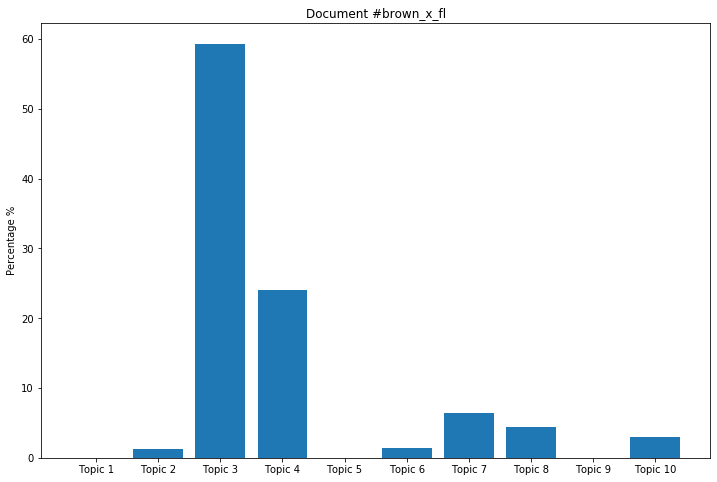

In [26]:
topic_dist(lda_model, doc=5)

In [27]:
def display_topics(model, vect, no_top_words=20):
    """
    expect: an instance of lda model from sklearn, an instance of vectorizer, and number of top words
    modify: 1. get the H factor (weights relative to each of the k topics)
               Each row corresponds to a topic, and each column corresponds to a unique term in the corpus vocabulary
            2. loop through each of document to get the indices of words in descending on log probabilities
    return: a list of top words for each of topics
    """
    feature_names = vect.get_feature_names()
    vector_H = model.components_
    for topic_idx, topic in enumerate(vector_H):
        print(f"\nTopic: {topic_idx}")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    # argsort() 
    #  It returns an array of indices of the same shape as that index data along the given axis in sorted order.
    # ex: array([900, 734, 171, 996, 303, 540, 321, 845, 108, 508], dtype=int64)

In [28]:
#### call the function above with model and CountV
display_topics(lda, vect)


Topic: 0
health energi administr children law offic ensur educ talk busi oil billion tax money militari senat life econom whi consum

Topic: 1
border law illeg immigr offic drug texa iowa agent case life militari whi kill constitut freedom human tri talk children

Topic: 2
rule water transport balanc improv project loan administr report depart area grant ensur busi law florida consum york safeti manag

Topic: 3
children health ms educ veteran administr school student life colleg worker pay end stand texa bush militari soldier iraqi month

Topic: 4
children health ms billion energi school rule educ talk tax veteran law ensur militari busi area invest student texa assist

Topic: 5
health energi children research educ tax product technolog consum improv medic benefit student insur polici ensur law medicar provis scienc

Topic: 6
tax budget spend money talk rule republican billion cut point pay tri price debat health appropri whi happen earmark taxpay

Topic: 7
veteran militari school car

In [29]:
# implement a print function 
# REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    """
    expect: an instance of lda model from sklearn, an instance of vectorizer, and number of top words
    modify: 1. get the H factor (weights relative to each of the k topics)
            Each row corresponds to a topic, and each column corresponds to a unique term in the corpus vocabulary
            2. loop through each of document to get the indices of words in descending on log probabilities
    return: a list of tuples that contains top words with log probabilities for each of topics
    """
    for idx, topic in enumerate(model.components_):
        print("\nTopic:  ", idx+1)
        feature_names = vect.get_feature_names()
        print([(feature_names[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])
    ## gets top n elements in decreasing order
    # argsort() 
    #  It returns an array of indices of the same shape as that index data along the given axis in sorted order.
    # ex: array([900, 734, 171, 996, 303, 540, 321, 845, 108, 508], dtype=int64)

In [30]:
#### call the function above with model and CountV
print_topics(lda, vect)


Topic:   1
[('health', 0.10018941029351694), ('energi', 0.10017696902039423), ('administr', 0.1001561099936467), ('children', 0.10015328914680399), ('law', 0.10015310862660232), ('offic', 0.10013528053423755), ('ensur', 0.10013217602217608), ('educ', 0.10013093863820668), ('talk', 0.10012501249688001), ('busi', 0.10012438664395731)]

Topic:   2
[('border', 3066.4200159141733), ('law', 2171.3926552513576), ('illeg', 2069.1655417174725), ('immigr', 1497.555477736428), ('offic', 1381.4189075348102), ('drug', 1292.9436761663642), ('texa', 1284.9579699047856), ('iowa', 1276.433209628876), ('agent', 1172.855223798953), ('case', 1166.1781333841845)]

Topic:   3
[('rule', 3063.7817157343197), ('water', 2452.63637097058), ('transport', 1971.9813417844991), ('balanc', 1800.3099628141251), ('improv', 1721.856394705025), ('project', 1697.9778226302349), ('loan', 1680.2202836548618), ('administr', 1661.5191650547445), ('report', 1654.4839773457597), ('depart', 1630.4129780428423)]

Topic:   4
[('c

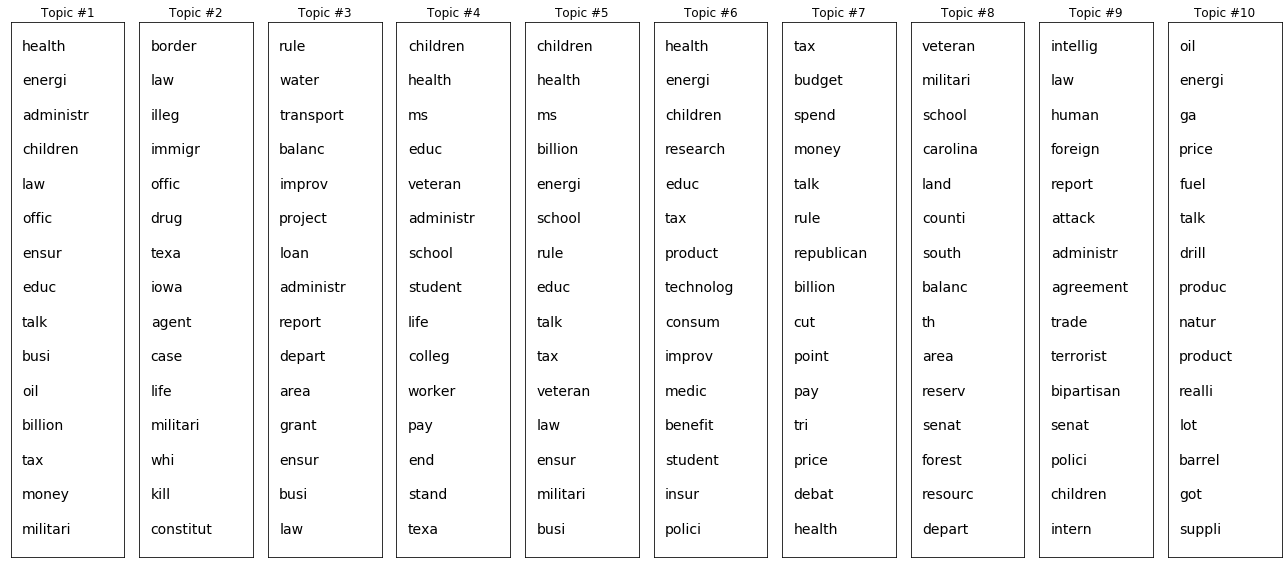

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# get an object of H factor (weights relative to each of the k topics)
# ex: (10, 15732) --> 10 topics by 15732 words
word_topic = np.array(lda.components_)
# transpose the object of H factor (weights relative to each of the k topics) as topic on columns and words on rows
# ex: (15732, 10) --> 15732 words by 10 topics 
word_topic = word_topic.transpose()

num_top_words = 15

vocab_array = np.asarray(vect.get_feature_names())
plt.figure(figsize=(18,8))
for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # subplot(row, column, plot_id_number ); plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order for each of topic
    top_words_idx_limit = top_words_idx[:num_top_words] # narrow down the specific numbers of indices
    top_words = vocab_array[top_words_idx_limit]
#     top_words_shares = word_topic[top_words_idx, t]

    # iterate the words to show on the plot
    for i, word in enumerate(top_words):
        plt.text(0.1, num_top_words-i-0.3, word, fontsize=14)
plt.tight_layout()
plt.show()


In [32]:
####################################################
##
## INTERACTIVE VISUALIZATION
##
####################################################
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
# pip install pyLDAvis
pyLDAvis.enable_notebook() ## not using notebook
dtm = np.matrix(text_dtm.toarray()) 
panel = LDAvis.prepare(lda, dtm, vect, mds='tsne')
pyLDAvis.show(panel)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [22/May/2020 20:33:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2020 20:33:39] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2020 20:33:39] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2020 20:33:39] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af  
https://gist.github.com/JoseHJBlanco/4a22629c4bd925bb2e1bdfb4fe627039  
https://www.youtube.com/watch?v=SF50IK5XgKA